# General Overview - Data Visualization

Using a clean dataset, we look for correlations between the independent variables and the target variable, the likelihood of being readmitted to the hospital, using graphs and plots. This is also a good time to get a better understanding of patient demographics, their experiences at the hospital, what medications are / are not using, and their diagnosed conditions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')
%matplotlib inline

In [2]:
data = pd.read_csv('diabetes_cleaned.csv', index_col=0) # import data

diabetes = data.copy() # save a copy of data as diabetes

In [3]:
diabetes.head(10)

,patient_nbr,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type
0,8222157,Caucasian,Female,[0-10),0,1,1,Pediatrics-Endocrinology,41,0,...,No,No,No,No,No,No,No,No,NO,Unknown
1,55629189,Caucasian,Female,[10-20),1,7,3,Unknown,59,0,...,No,No,Up,No,No,No,Ch,Yes,>30,Emergency
2,86047875,AfricanAmerican,Female,[20-30),1,7,2,Unknown,11,5,...,No,No,No,No,No,No,No,Yes,NO,Emergency
3,82442376,Caucasian,Male,[30-40),1,7,2,Unknown,44,1,...,No,No,Up,No,No,No,Ch,Yes,NO,Emergency
4,42519267,Caucasian,Male,[40-50),1,7,1,Unknown,51,0,...,No,No,Steady,No,No,No,Ch,Yes,NO,Emergency
5,82637451,Caucasian,Male,[50-60),1,2,3,Unknown,31,6,...,No,No,Steady,No,No,No,No,Yes,>30,Urgent
6,84259809,Caucasian,Male,[60-70),1,2,4,Unknown,70,1,...,No,No,Steady,No,No,No,Ch,Yes,NO,Elective
7,114882984,Caucasian,Male,[70-80),1,7,5,Unknown,73,0,...,No,No,No,No,No,No,No,Yes,>30,Emergency
8,48330783,Caucasian,Female,[80-90),1,4,13,Unknown,68,2,...,No,No,Steady,No,No,No,Ch,Yes,NO,Urgent
9,63555939,Caucasian,Female,[90-100),3,4,12,InternalMedicine,33,3,...,No,No,Steady,No,No,No,Ch,Yes,NO,Elective


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67874 entries, 0 to 67873
Data columns (total 43 columns):
patient_nbr                 67874 non-null int64
race                        67874 non-null object
gender                      67874 non-null object
age                         67874 non-null object
discharge_disposition_id    67874 non-null int64
admission_source_id         67874 non-null int64
time_in_hospital            67874 non-null int64
medical_specialty           67874 non-null object
num_lab_procedures          67874 non-null int64
num_procedures              67874 non-null int64
num_medications             67874 non-null int64
number_outpatient           67874 non-null int64
number_emergency            67874 non-null int64
number_inpatient            67874 non-null int64
diag_1                      67874 non-null object
diag_2                      67874 non-null object
diag_3                      67874 non-null object
number_diagnoses            67874 non-null int64
ma

In [5]:
round(diabetes.describe(), 2)

,patient_nbr,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,6.787400e+04,67874.00,67874.00,67874.00,67874.00,67874.00,67874.00,67874.00,67874.00,67874.00,67874.00
mean,5.527052e+07,2.51,4.42,4.28,42.85,1.43,15.67,0.28,0.11,0.18,7.25
std,3.943856e+07,3.75,2.97,2.94,19.93,1.76,8.28,1.07,0.52,0.61,1.99
min,1.350000e+02,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00
25%,2.341582e+07,1.00,1.00,2.00,31.00,0.00,10.00,0.00,0.00,0.00,6.00
50%,4.919746e+07,1.00,7.00,3.00,44.00,1.00,14.00,0.00,0.00,0.00,8.00
75%,8.780412e+07,3.00,7.00,6.00,57.00,2.00,20.00,0.00,0.00,0.00,9.00
max,1.895026e+08,28.00,25.00,14.00,132.00,6.00,81.00,42.00,42.00,12.00,16.00


# readmitted patients overall

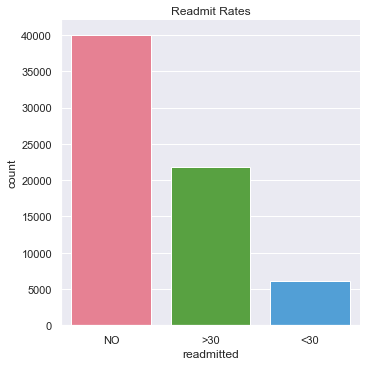

In [6]:
sns.catplot(x='readmitted', kind='count', palette='husl', data=diabetes)
plt.title('Readmit Rates')
plt.show()

In [7]:
# crosstab function

def chart_display(x, y):
    return pd.crosstab(x, y, margins=True, margins_name='Total')

# patient demographics, gender, and age

## demographics

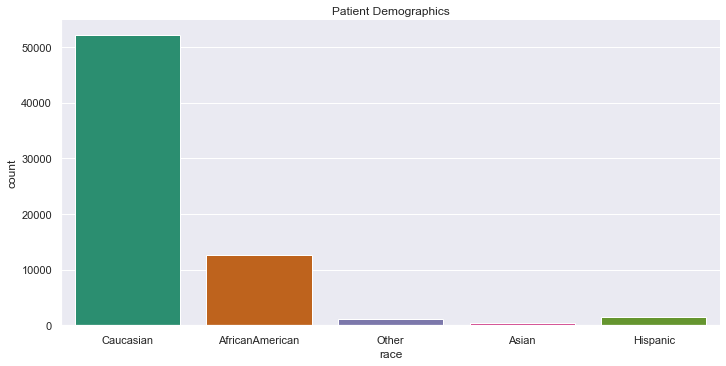

In [8]:
sns.catplot(x='race', kind='count', palette='Dark2', data=diabetes, aspect=2)
plt.title('Patient Demographics')
plt.show()

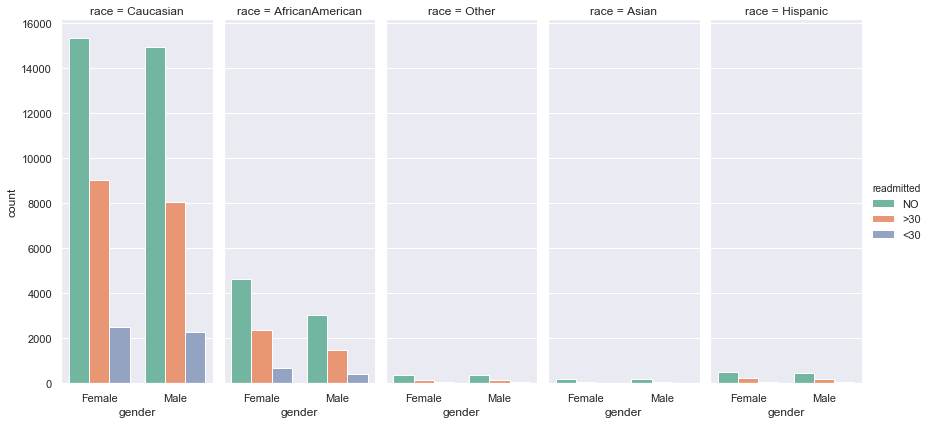

In [9]:
sns.catplot(x='gender', hue='readmitted', col='race', palette='Set2', data=diabetes, height=6, aspect=0.4, kind='count')
plt.show()

In [10]:
chart_display(diabetes.readmitted, diabetes.race)

race,AfricanAmerican,Asian,Caucasian,Hispanic,Other,Total
readmitted,,,,,,
<30,1092,41,4790,119,79,6121
>30,3864,107,17059,412,311,21753
NO,7638,340,30299,964,759,40000
Total,12594,488,52148,1495,1149,67874


## gender

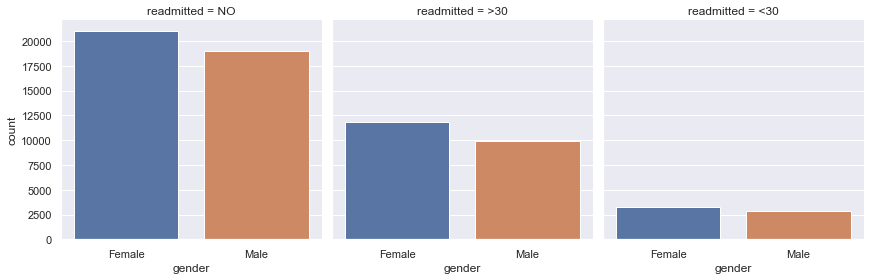

In [11]:
sns.catplot('gender', col='readmitted', data=diabetes, kind='count', height=4, aspect=1)
plt.show()

In [12]:
chart_display(diabetes.gender, diabetes.readmitted)

readmitted,<30,>30,NO,Total
gender,,,,
Female,3283,11846,21035,36164
Male,2838,9907,18965,31710
Total,6121,21753,40000,67874


## age groups

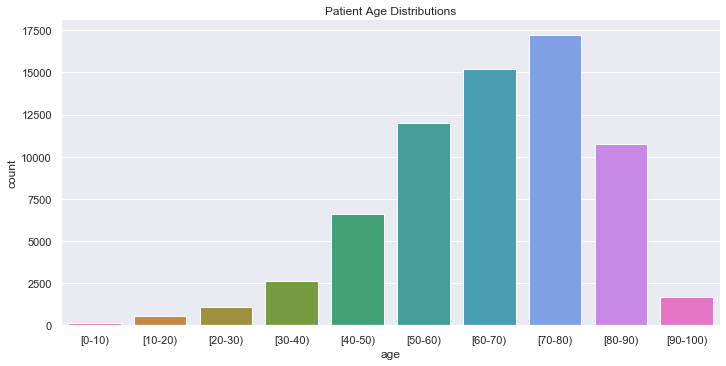

In [13]:
sns.catplot(x='age', kind='count', palette='husl', data=diabetes, aspect=2)
plt.title('Patient Age Distributions')
plt.show()

It looks like most patients are older, 50+ years old, though there aren't many patients over 90.

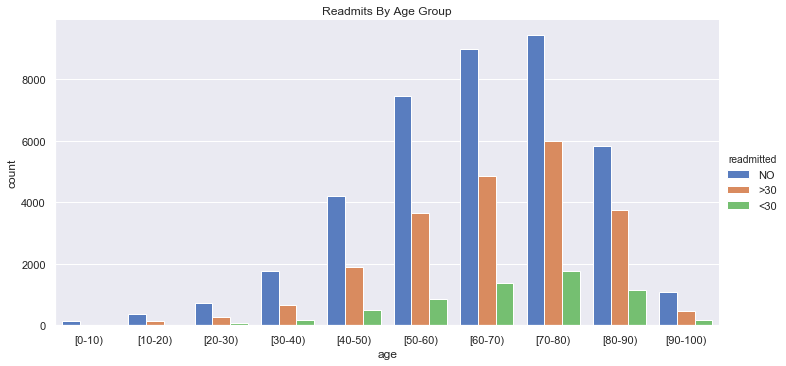

In [14]:
sns.catplot(x='age', hue='readmitted', kind='count', palette='muted', aspect=2, data=diabetes)
plt.title('Readmits By Age Group')
plt.show()

In every age group, the majority of patients are not readmitted for the same issue. Readmissions that do occur mostly happen after 30 days, and a small number of patients are back within 30 days. The 70-80 age group has the highest patient numbers for all three readmit possibilities, and they also account for the majority of patients admitted.

In [15]:
chart_display(diabetes.readmitted, diabetes.age)

age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100),Total
readmitted,,,,,,,,,,,
<30,3,26,81,186,489,859,1382,1776,1158,161,6121
>30,24,139,271,676,1908,3662,4847,5996,3765,465,21753
NO,125,359,732,1751,4218,7474,8984,9449,5834,1074,40000
Total,152,524,1084,2613,6615,11995,15213,17221,10757,1700,67874


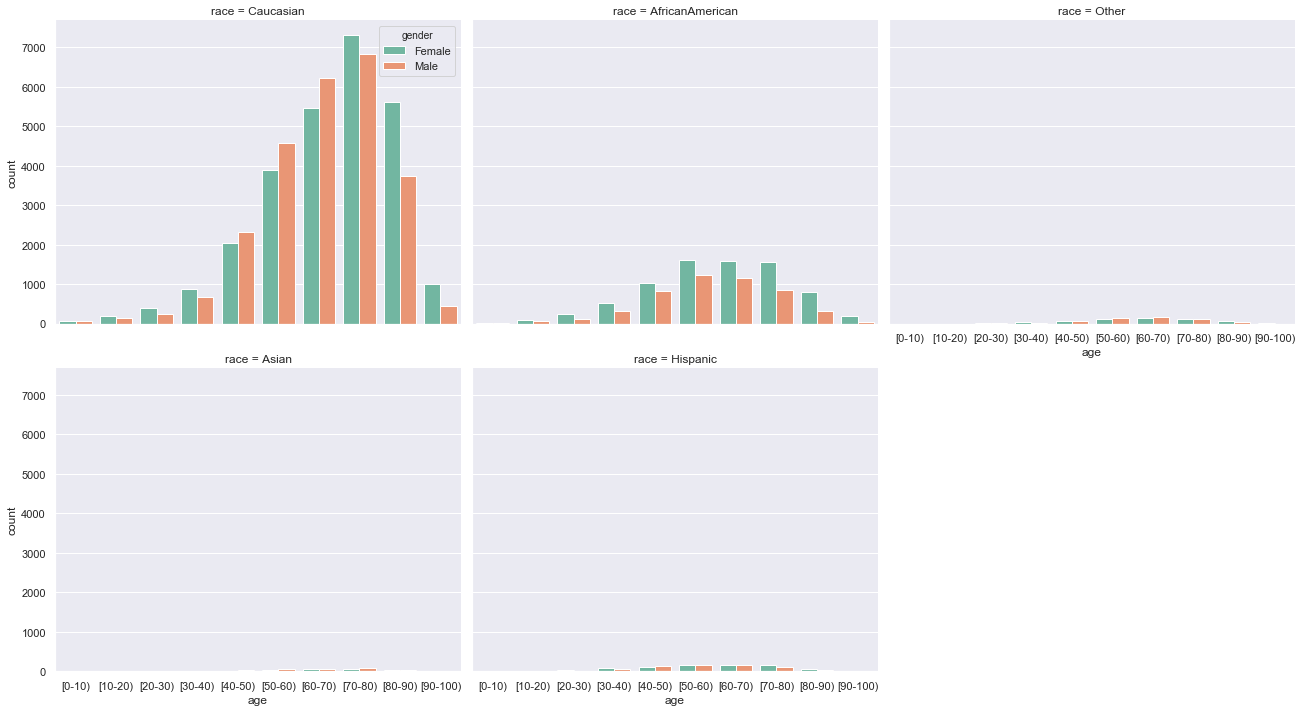

In [16]:
sns.catplot(x='age', hue='gender', col='race', col_wrap=3, palette='Set2', data=diabetes, aspect=1.2, kind='count', legend_out=False)
plt.show()

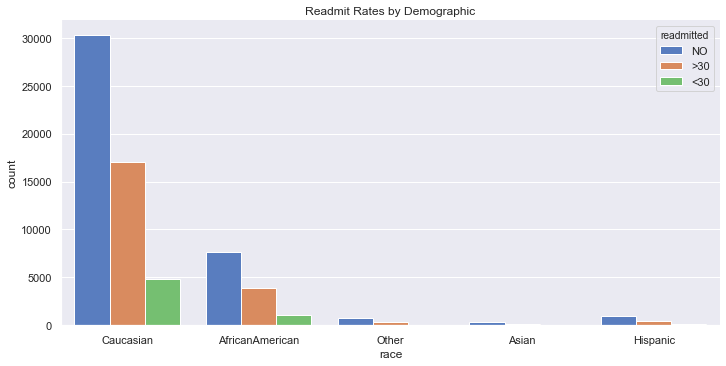

In [17]:
sns.catplot(x='race', hue='readmitted', kind='count', palette='muted', aspect=2, data=diabetes, legend_out=False)
plt.title('Readmit Rates by Demographic')
plt.show()

In [18]:
chart_display([diabetes.readmitted, diabetes.gender], diabetes.age)

age                [0-10)  [10-20)  [20-30)  [30-40)  [40-50)  [50-60)  \
readmitted gender                                                        
<30        Female       1       16       54       98      247      432   
           Male         2       10       27       88      242      427   
>30        Female      13       93      177      375      956     1879   
           Male        11       46       94      301      952     1783   
NO         Female      65      188      467     1043     2051     3529   
           Male        60      171      265      708     2167     3945   
Total                 152      524     1084     2613     6615    11995   

age                [60-70)  [70-80)  [80-90)  [90-100)  Total  
readmitted gender                                              
<30        Female      669      939      715       112   3283  
           Male        713      837      443        49   2838  
>30        Female     2445     3238     2328       342  11846  
           Male       2402     2758     1437       123   9907  
NO         Female     4326     5062     3546       758  21035  
           Male       4658     4387     2288       316  18965  
Total                15213    17221    10757      1700  67874

The majority of patients are Caucasian. There are more female patients than males and females are more likely to not be readmitted, be readmitted within 30 days, and after 30 days.

# admission type, source, and discharge disposition

Here, we take a look at admission type, the source, and discharge disposition (what happened after the patients left the hospital).

## admission type

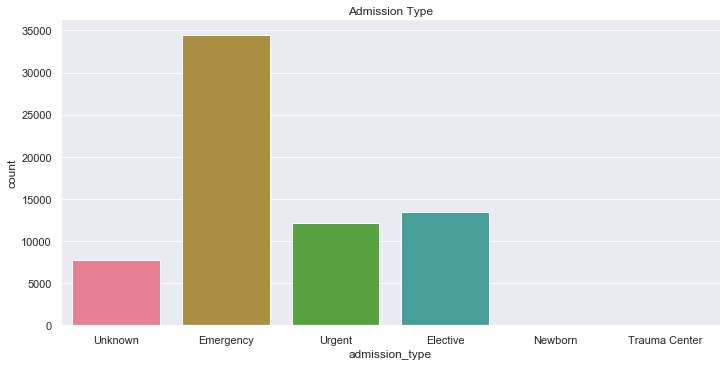

In [19]:
sns.catplot(x='admission_type', kind='count', palette='husl', data=diabetes, aspect=2)
plt.title('Admission Type')
plt.show()

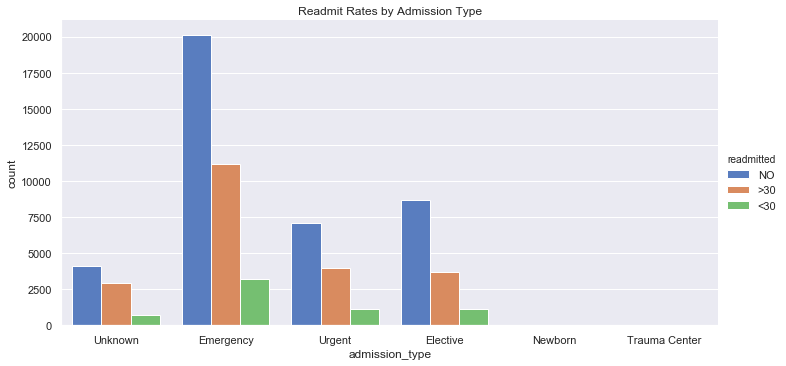

In [20]:
sns.catplot(x='admission_type', hue='readmitted', kind='count', palette='muted', aspect=2, data=diabetes)
plt.title('Readmit Rates by Admission Type')
plt.show()

In [21]:
chart_display(diabetes.readmitted, diabetes.admission_type)

admission_type,Elective,Emergency,Newborn,Trauma Center,Unknown,Urgent,Total
readmitted,,,,,,,
<30,1125,3173,1,0,724,1098,6121
>30,3656,11184,2,0,2939,3972,21753
NO,8663,20116,6,17,4109,7089,40000
Total,13444,34473,9,17,7772,12159,67874


## discharge disposition

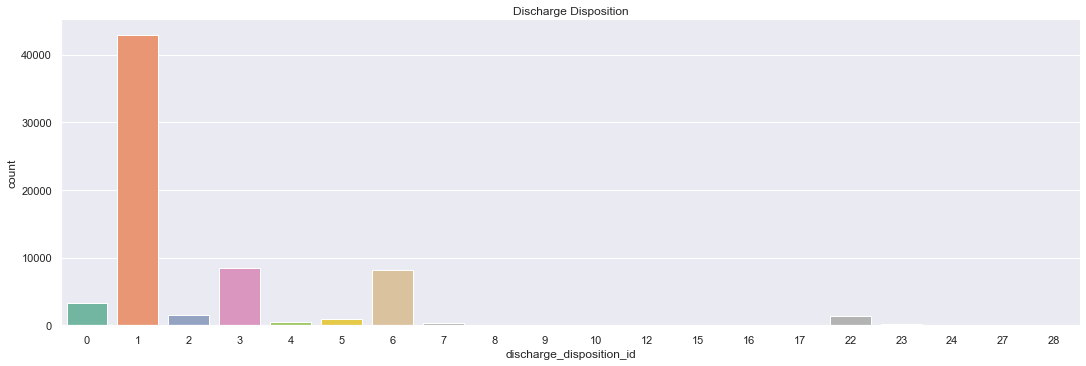

In [22]:
sns.catplot(x='discharge_disposition_id', kind='count', palette='Set2', data=diabetes, aspect=3)
plt.title('Discharge Disposition')
plt.show()

The majority of patients went home after being discharged from the hospital (ID: 1). Others were sent to a skilled nursing facility (SNF) or discharged to a home with home health services, representing IDs 3 and 6 respectively.

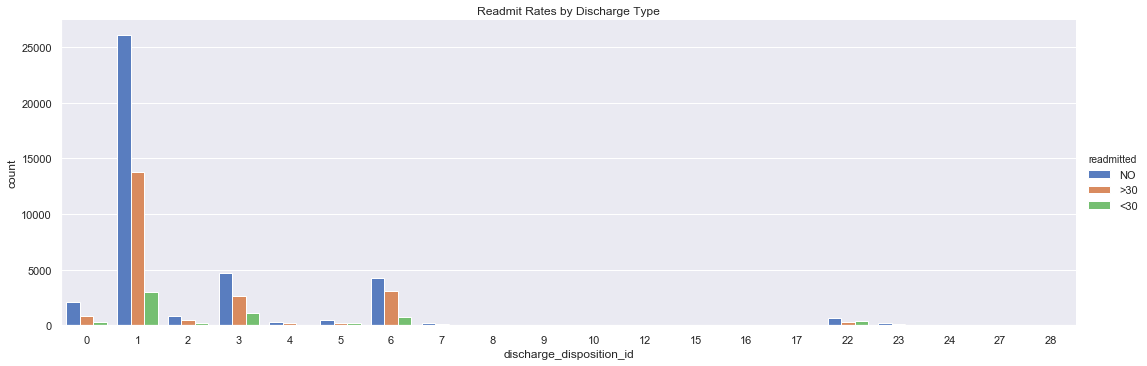

In [23]:
sns.catplot(x='discharge_disposition_id', hue='readmitted', kind='count', palette='muted', aspect=3, data=diabetes)
plt.title('Readmit Rates by Discharge Type')
plt.show()

In [24]:
chart_display(diabetes.discharge_disposition_id, diabetes.readmitted)

readmitted,<30,>30,NO,Total
discharge_disposition_id,,,,
0,295,830,2092,3217
1,3007,13787,26113,42907
2,204,432,842,1478
3,1130,2676,4686,8492
4,51,159,286,496
5,179,239,457,875
6,778,3040,4284,8102
7,39,112,247,398
8,7,24,41,72


## admission source

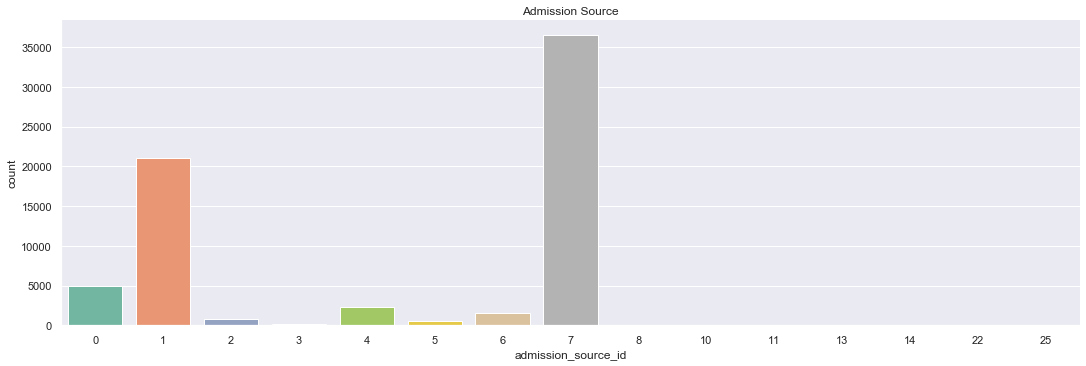

In [25]:
sns.catplot(x='admission_source_id', kind='count', palette='Set2', data=diabetes, aspect=3)
plt.title('Admission Source')
plt.show()

Most patients are admitted via the emergency room, or ID 7, while others came with a physician referral, or ID 1.

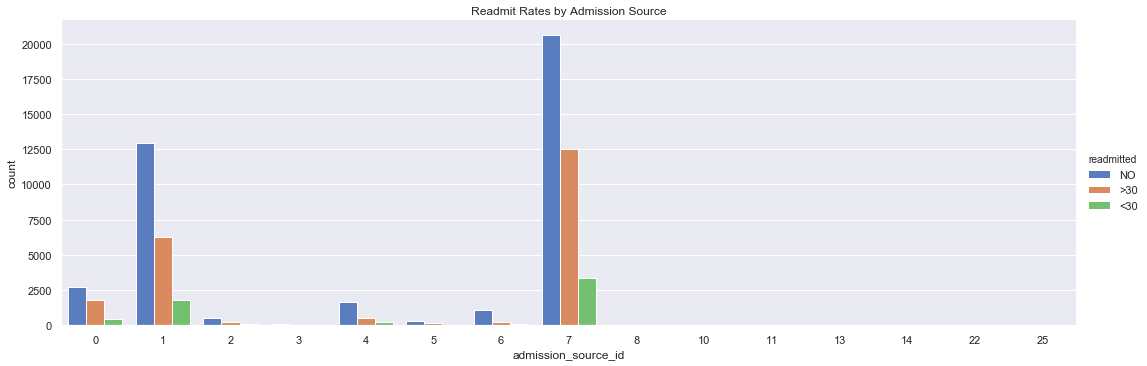

In [26]:
sns.catplot(x='admission_source_id', hue='readmitted', kind='count', palette='muted', aspect=3, data=diabetes)
plt.title('Readmit Rates by Admission Source')
plt.show()

In [27]:
chart_display(diabetes.readmitted, diabetes.admission_source_id)

admission_source_id,0,1,2,3,4,5,6,7,8,10,11,13,14,22,25,Total
readmitted,,,,,,,,,,,,,,,,
<30,442,1822,79,18,206,47,114,3392,1,0,0,0,0,0,0,6121
>30,1779,6294,224,40,485,144,269,12515,1,2,0,0,0,0,0,21753
NO,2710,12934,547,77,1668,313,1107,20621,9,4,1,1,2,4,2,40000
Total,4931,21050,850,135,2359,504,1490,36528,11,6,1,1,2,4,2,67874


# hospital stay, tests, and outcomes

Here, we look at time_in_hospital, medical_specialty, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency, and number_inpatient columns.       

## time in hospital

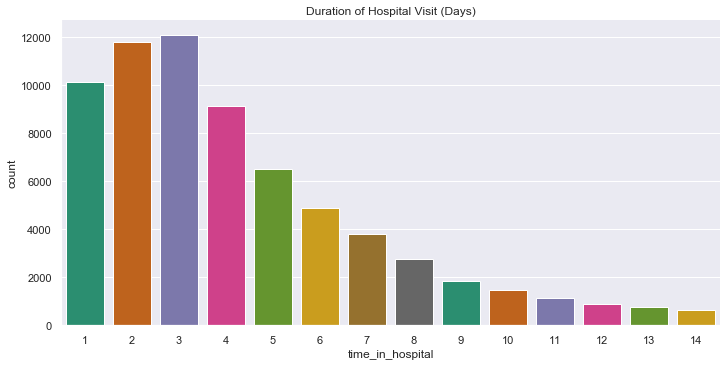

In [28]:
sns.catplot(x='time_in_hospital', kind='count', palette='Dark2', data=diabetes, aspect=2)
plt.title('Duration of Hospital Visit (Days)')
plt.show()

In [29]:
print('Average time spent in hospital: {} days'.format(round(np.mean(diabetes.time_in_hospital), 2)))
print('Median time spent in hospital: {} days'.format(round(np.median(diabetes.time_in_hospital), 2)))

Average time spent in hospital: 4.28 days
Median time spent in hospital: 3.0 days


## medical specialty

The majority of patients do not have a medical specialty listed for their visit.

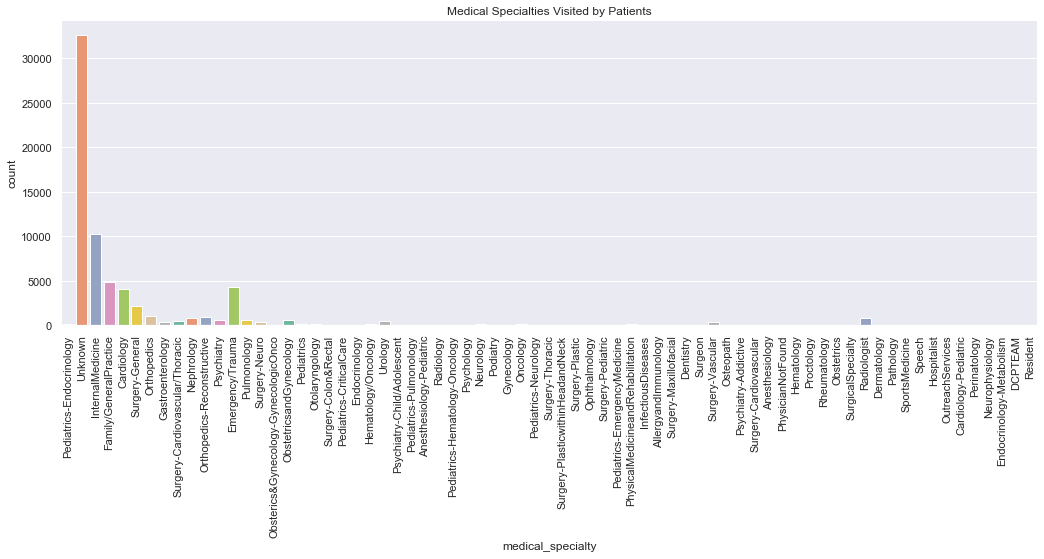

In [30]:
d = sns.catplot(x='medical_specialty', kind='count', palette='Set2', aspect=3, data=diabetes)
d.set_xticklabels(rotation=90)
plt.title('Medical Specialties Visited by Patients')
plt.show()

## number of lab procedures

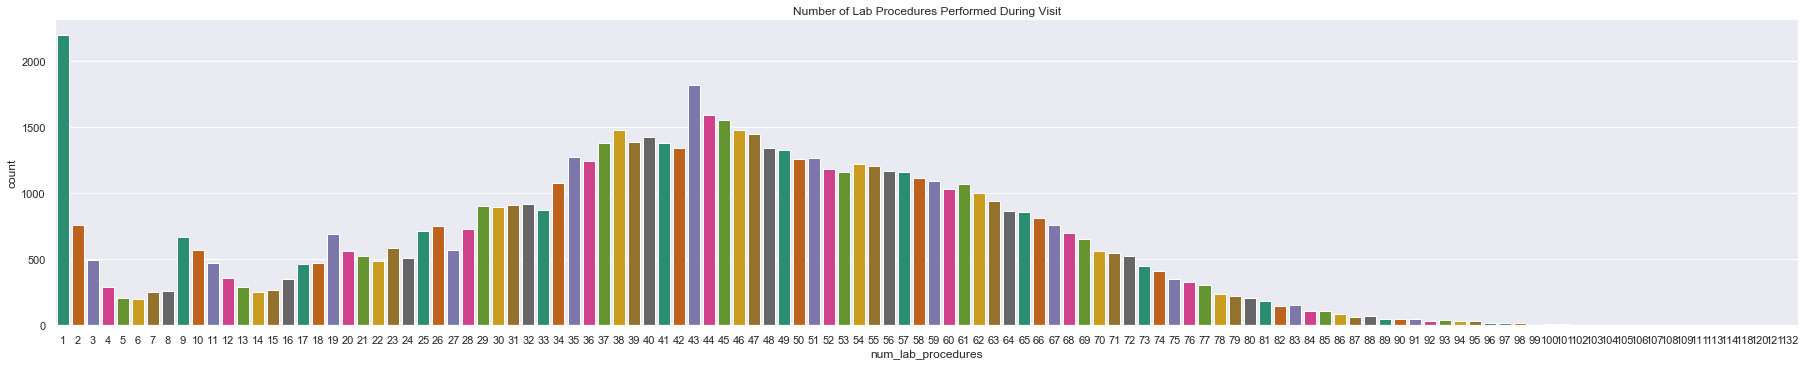

In [31]:
sns.catplot(x='num_lab_procedures', kind='count', palette='Dark2', data=diabetes, aspect=5)
plt.title('Number of Lab Procedures Performed During Visit')
plt.show()

In [32]:
print('Lab Procedures Performed During Visit')
print('Average: {} lab procedures'.format(round(np.mean(diabetes.num_lab_procedures), 2)))
print('Median: {} lab procedures'.format(round(np.median(diabetes.num_lab_procedures), 2)))

Lab Procedures Performed During Visit
Average: 42.85 lab procedures
Median: 44.0 lab procedures


## number of procedures (other than lab)

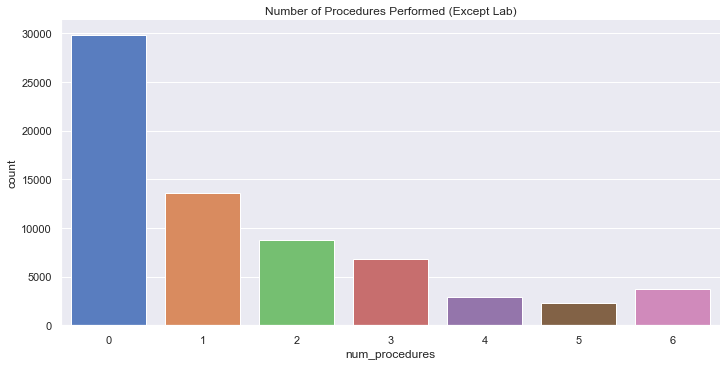

In [33]:
sns.catplot(x='num_procedures', kind='count', palette='muted', data=diabetes, aspect=2)
plt.title('Number of Procedures Performed (Except Lab)')
plt.show()

In [34]:
print('Procedures Performed During Visit Besides Lab:')
print('Average: {} procedures'.format(round(np.mean(diabetes.num_procedures), 2)))
print('Median: {} procedures'.format(round(np.median(diabetes.num_procedures), 2)))

Procedures Performed During Visit Besides Lab:
Average: 1.43 procedures
Median: 1.0 procedures


## number of medications

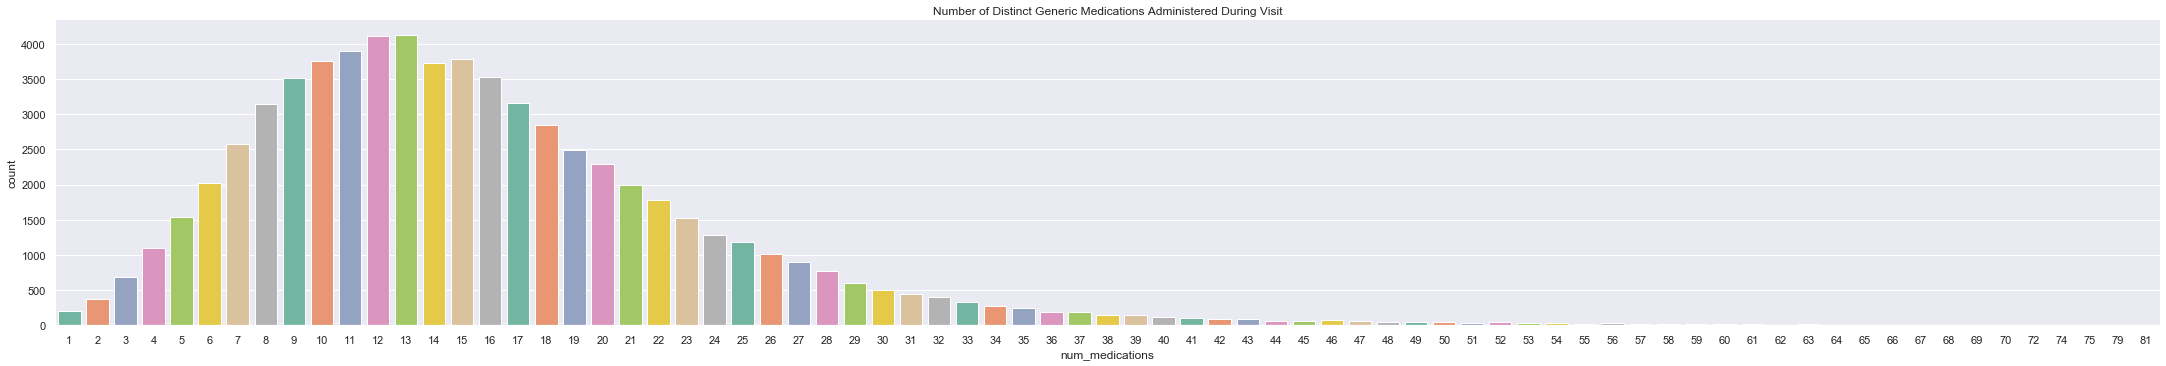

In [35]:
sns.catplot(x='num_medications', kind='count', palette='Set2', data=diabetes, aspect=6)
plt.title('Number of Distinct Generic Medications Administered During Visit')
plt.show()

In [36]:
print('Distinct Generic Medications Administered During Visit:')
print('Average: {} medications'.format(round(np.mean(diabetes.num_medications), 2)))
print('Median: {} medications'.format(round(np.median(diabetes.num_medications), 2)))

Distinct Generic Medications Administered During Visit:
Average: 15.67 medications
Median: 14.0 medications


In [37]:
diabetes.groupby('readmitted')['num_medications'].describe()

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
<30,6121.0,16.661003,8.344146,1.0,11.0,15.0,21.0,81.0
>30,21753.0,15.881166,7.759469,1.0,11.0,15.0,20.0,70.0
NO,40000.0,15.403850,8.524498,1.0,10.0,14.0,19.0,79.0


## number of outpatient visits

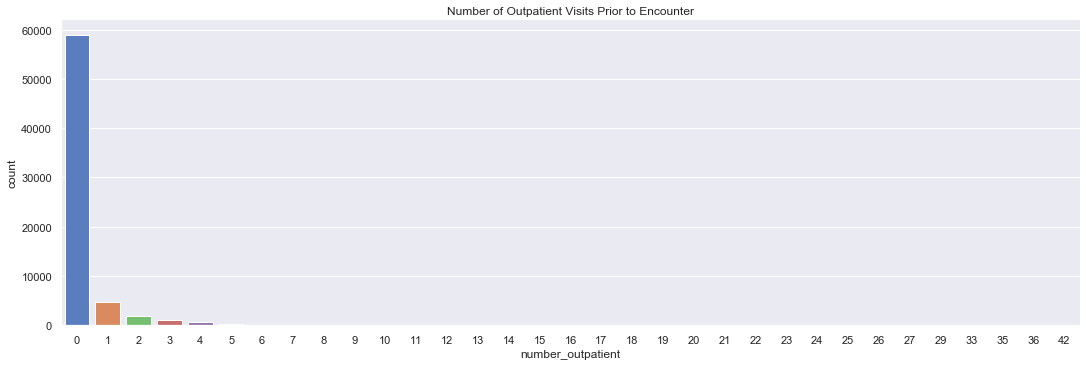

In [38]:
sns.catplot(x='number_outpatient', kind='count', palette='muted', data=diabetes, aspect=3)
plt.title('Number of Outpatient Visits Prior to Encounter')
plt.show()

In [39]:
diabetes.groupby('readmitted')['number_outpatient'].describe()

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
<30,6121.0,0.313674,1.055467,0.0,0.0,0.0,0.0,23.0
>30,21753.0,0.380361,1.311057,0.0,0.0,0.0,0.0,42.0
NO,40000.0,0.226100,0.919429,0.0,0.0,0.0,0.0,36.0


## number of emergency visits

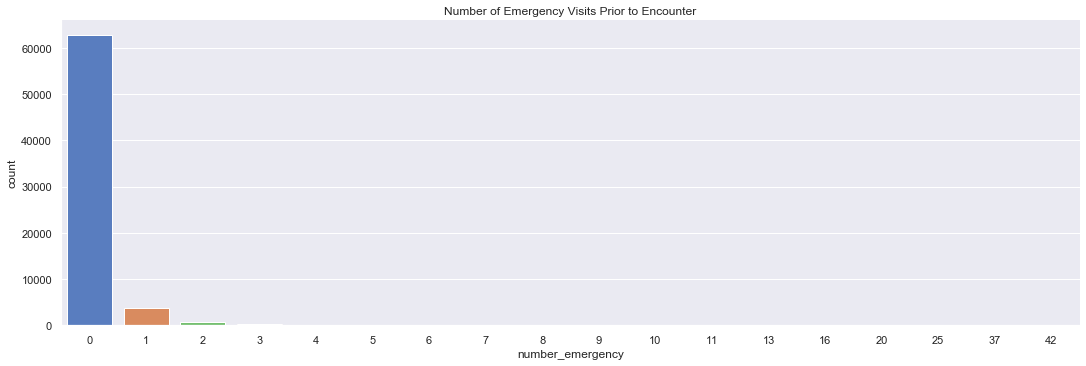

In [40]:
sns.catplot(x='number_emergency', kind='count', palette='muted', data=diabetes, aspect=3)
plt.title('Number of Emergency Visits Prior to Encounter')
plt.show()

In [41]:
diabetes.groupby('readmitted')['number_emergency'].describe()

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
<30,6121.0,0.152099,0.587922,0.0,0.0,0.0,0.0,11.0
>30,21753.0,0.153634,0.633681,0.0,0.0,0.0,0.0,42.0
NO,40000.0,0.073200,0.426141,0.0,0.0,0.0,0.0,37.0


The emergency visit numbers are heavily skewed, showing that the majority of patients did not have any visits to the emergency room in the year prior to their current appointment.

## number of inpatient visits

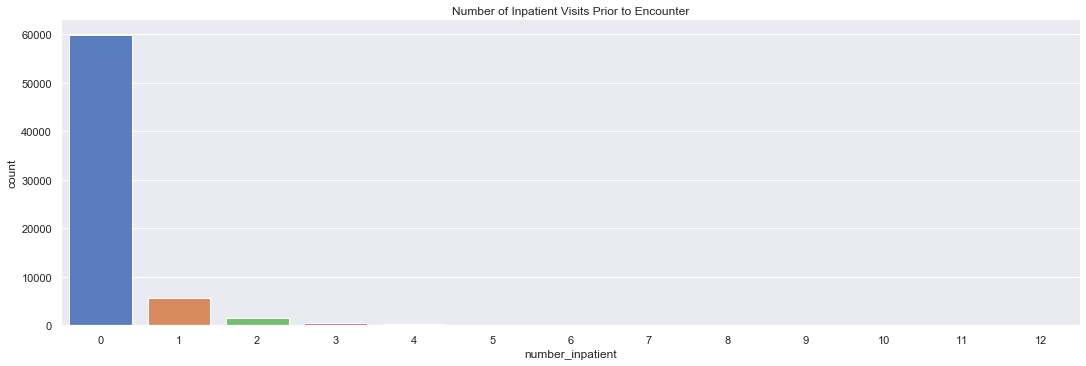

In [42]:
sns.catplot(x='number_inpatient', kind='count', palette='muted', data=diabetes, aspect=3)
plt.title('Number of Inpatient Visits Prior to Encounter')
plt.show()

In [43]:
diabetes.groupby('readmitted')['number_inpatient'].describe()

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
<30,6121.0,0.372161,0.988183,0.0,0.0,0.0,0.0,12.0
>30,21753.0,0.258999,0.722377,0.0,0.0,0.0,0.0,11.0
NO,40000.0,0.104800,0.417458,0.0,0.0,0.0,0.0,10.0


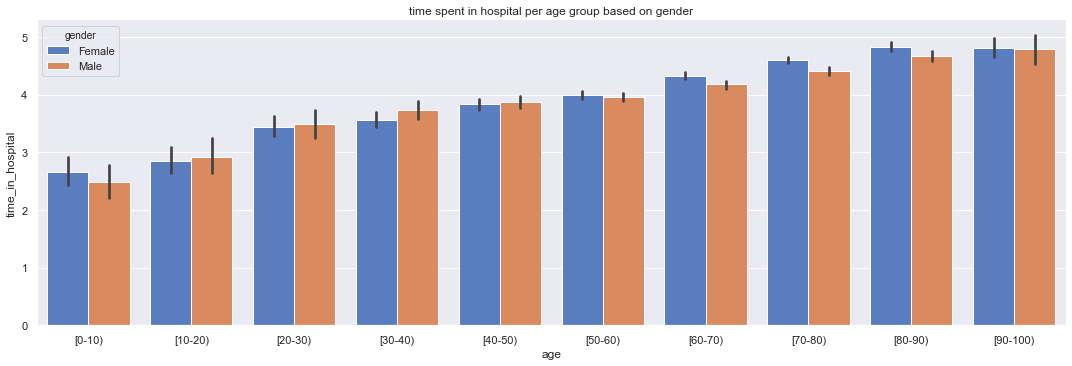

In [44]:
# who is spending the most time in hospitals during visits?
sns.catplot(x='age', y='time_in_hospital', hue='gender', palette='muted', aspect=3, kind='bar', data=diabetes, legend_out=False)
plt.title('time spent in hospital per age group based on gender')
plt.show()

In [45]:
chart_display(diabetes.age, diabetes.time_in_hospital)

time_in_hospital,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Total
age,,,,,,,,,,,,,,,
[0-10),28,51,47,16,6,3,0,1,0,0,0,0,0,0,152
[10-20),110,187,114,46,15,15,8,12,2,8,2,2,2,1,524
[20-30),183,268,245,157,78,44,25,20,14,24,10,8,2,6,1084
[30-40),450,637,526,316,220,123,101,71,43,41,34,20,20,11,2613
[40-50),1223,1386,1179,815,570,409,322,224,136,89,80,65,63,54,6615
[50-60),2208,2245,2105,1595,1061,770,583,403,301,240,149,138,107,90,11995
[60-70),2435,2606,2683,1995,1439,1056,844,655,394,340,263,201,170,132,15213
[70-80),2284,2727,2958,2345,1792,1338,1037,787,546,418,337,258,224,170,17221
[80-90),1084,1506,1914,1573,1140,973,733,520,358,260,243,175,136,142,10757


In [46]:
diabetes.groupby('readmitted')['time_in_hospital'].describe()

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
<30,6121.0,4.798562,3.061052,1.0,2.0,4.0,7.0,14.0
>30,21753.0,4.417781,2.972004,1.0,2.0,4.0,6.0,14.0
NO,40000.0,4.117950,2.882342,1.0,2.0,3.0,5.0,14.0


# patient diagnoses

## number of diagnoses

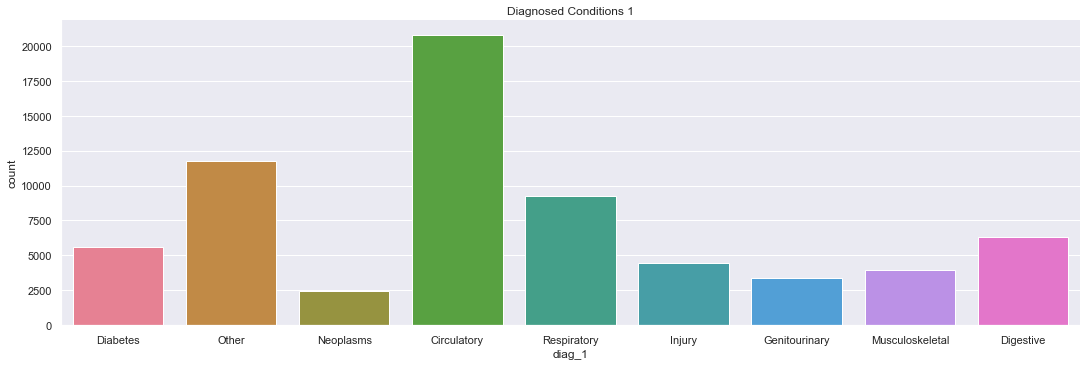

In [47]:
sns.catplot(x='diag_1', kind='count', palette='husl', data=diabetes, aspect=3)
plt.title('Diagnosed Conditions 1')
plt.show()

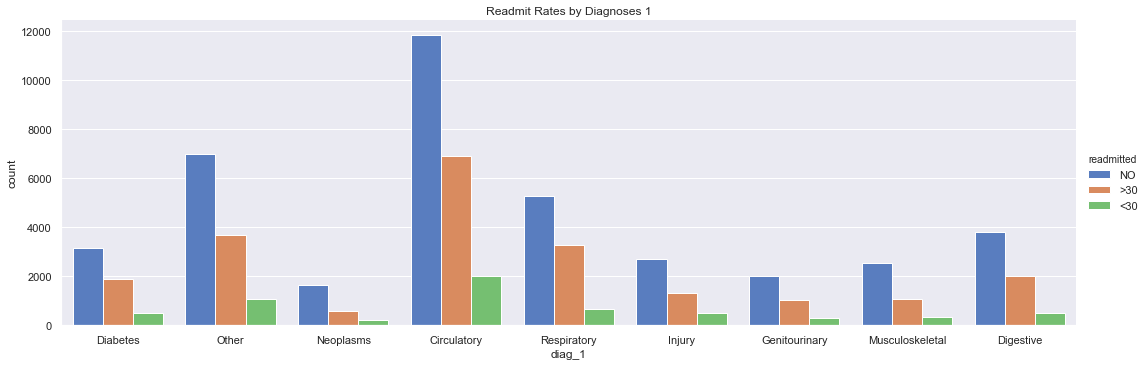

In [48]:
sns.catplot(x='diag_1', hue='readmitted', kind='count', palette='muted', aspect=3, data=diabetes)
plt.title('Readmit Rates by Diagnoses 1')
plt.show()

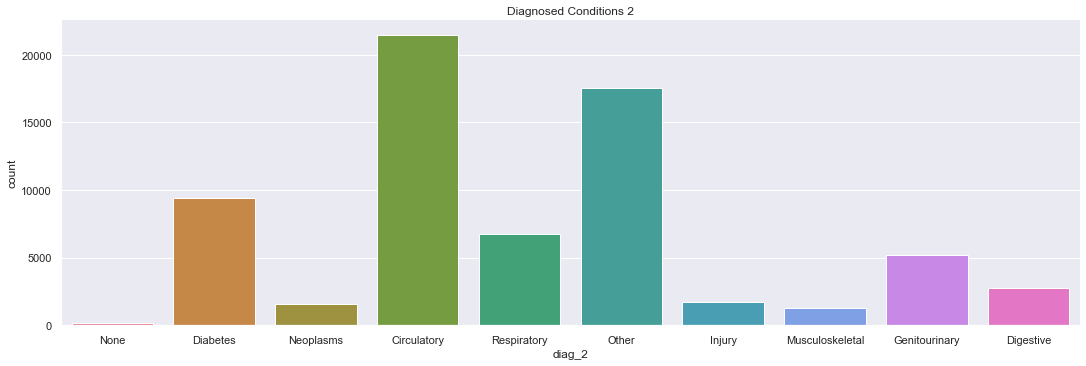

In [49]:
sns.catplot(x='diag_2', kind='count', palette='husl', data=diabetes, aspect=3)
plt.title('Diagnosed Conditions 2')
plt.show()

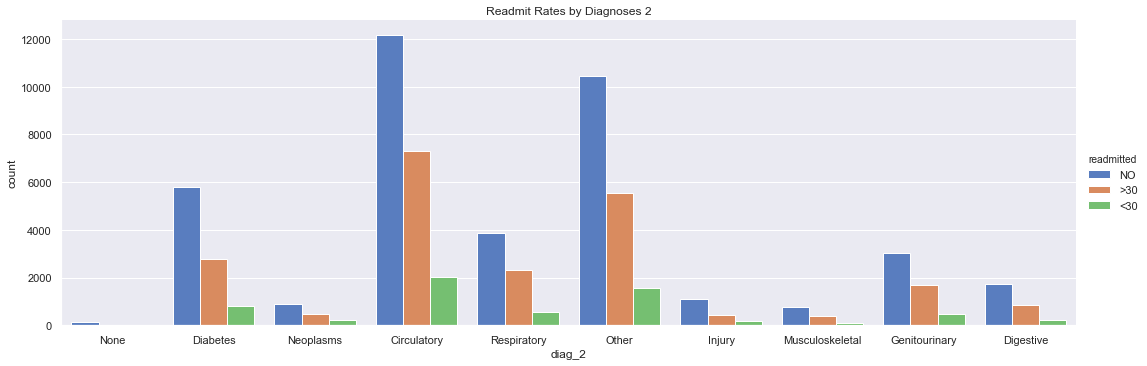

In [50]:
sns.catplot(x='diag_2', hue='readmitted', kind='count', palette='muted', aspect=3, data=diabetes)
plt.title('Readmit Rates by Diagnoses 2')
plt.show()

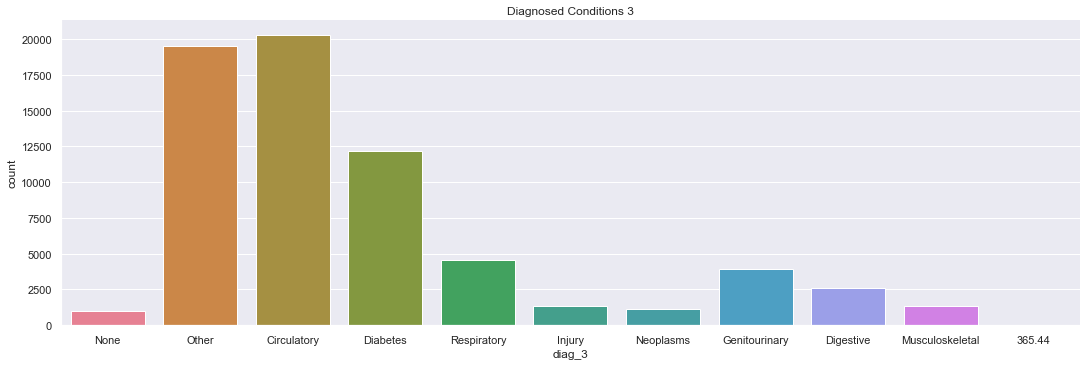

In [51]:
sns.catplot(x='diag_3', kind='count', palette='husl', data=diabetes, aspect=3)
plt.title('Diagnosed Conditions 3')
plt.show()

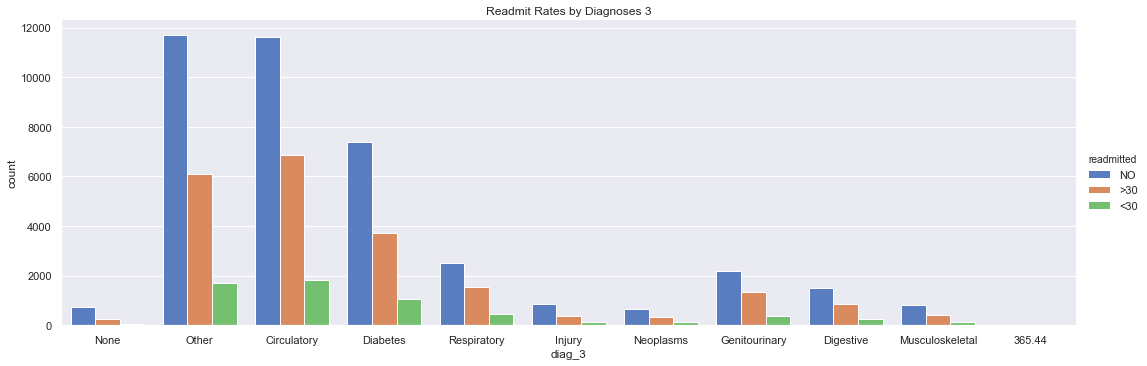

In [52]:
sns.catplot(x='diag_3', hue='readmitted', kind='count', palette='muted', aspect=3, data=diabetes)
plt.title('Readmit Rates by Diagnoses 3')
plt.show()

In [53]:
diabetes.diag_3.unique()

array(['None', 'Other', 'Circulatory', 'Diabetes', 'Respiratory',
       'Injury', 'Neoplasms', 'Genitourinary', 'Digestive',
       'Musculoskeletal', '365.44'], dtype=object)

# number of diagnoses, glucose levels, and HbA1C test

Here, we are covering number_diagnoses, max_glu_serum, and HbA1C result.

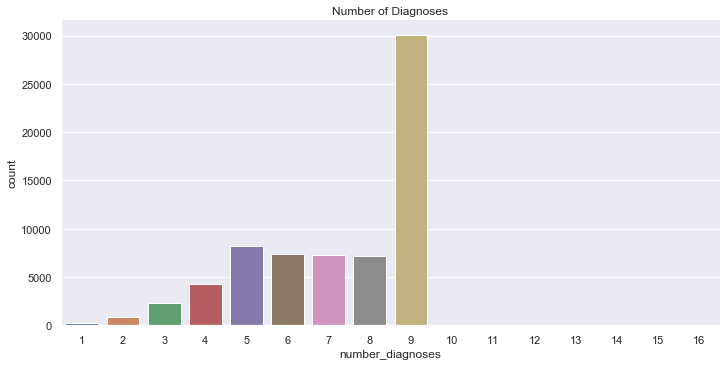

In [54]:
sns.catplot(x='number_diagnoses', kind='count', palette='deep', data=diabetes, aspect=2)
plt.title('Number of Diagnoses')
plt.show()

In [55]:
print('Number of Diagnoses:')
print('Average: {} diagnoses'.format(round(np.mean(diabetes.number_diagnoses), 2)))
print('Median: {} diagnoses'.format(round(np.median(diabetes.number_diagnoses), 2)))

Number of Diagnoses:
Average: 7.25 diagnoses
Median: 8.0 diagnoses


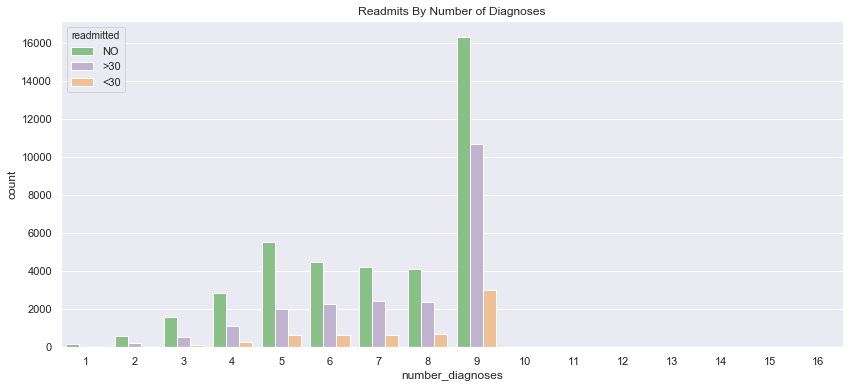

In [56]:
# number of diagnoses and readmit rate
plt.figure(figsize=(14, 6))
sns.countplot(x='number_diagnoses', hue='readmitted', palette='Accent', data=diabetes)
plt.title('Readmits By Number of Diagnoses')
plt.show()

In [57]:
# number of diagnoses
chart_display(diabetes.readmitted, diabetes.number_diagnoses)

number_diagnoses,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,Total
readmitted,,,,,,,,,,,,,,,,,
<30,6,41,134,289,628,643,632,704,3036,1,1,1,1,1,0,3,6121
>30,28,204,552,1121,2032,2289,2449,2375,10684,1,3,2,3,2,2,6,21753
NO,154,598,1591,2874,5557,4481,4224,4138,16343,6,2,3,6,2,3,18,40000
Total,188,843,2277,4284,8217,7413,7305,7217,30063,8,6,6,10,5,5,27,67874


## glucose serum test results

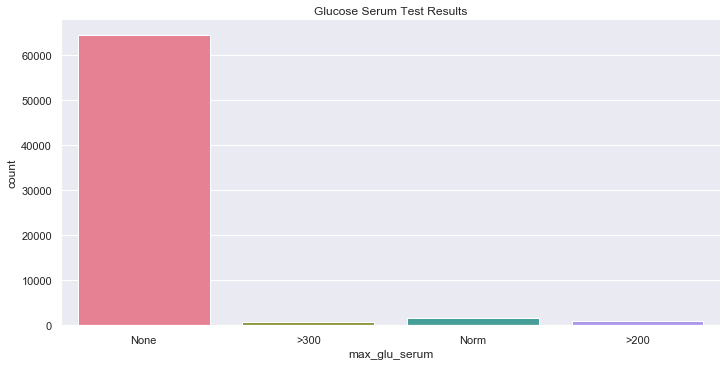

In [58]:
sns.catplot(x='max_glu_serum', kind='count', palette='husl', data=diabetes, aspect=2)
plt.title('Glucose Serum Test Results')
plt.show()

Since the majority of patients do not have a glucose reading, they will be excluded for the next graph in order to show the readmit rates for patients who do have a reading.

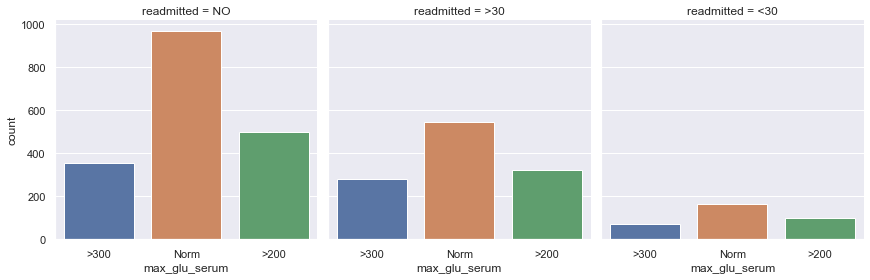

In [59]:
# exclude patients without a glucose reading
glucose_none = diabetes[diabetes.max_glu_serum != 'None']

# glucose serum results and readmit impact
sns.catplot('max_glu_serum', col='readmitted', data=glucose_none, kind='count', height=4, aspect=1)
plt.show()

In [60]:
chart_display(diabetes.readmitted, diabetes.max_glu_serum)

max_glu_serum,>200,>300,None,Norm,Total
readmitted,,,,,
<30,101,70,5787,163,6121
>30,320,281,20606,546,21753
NO,498,352,38183,967,40000
Total,919,703,64576,1676,67874


## HbA1C results

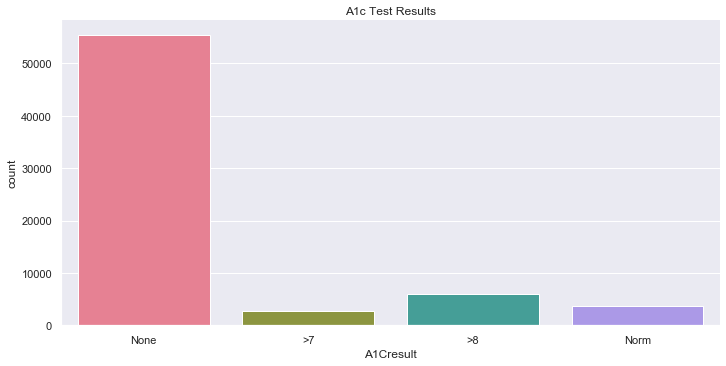

In [61]:
sns.catplot(x='A1Cresult', kind='count', palette='husl', data=diabetes, aspect=2)
plt.title('A1c Test Results')
plt.show()

Similar to the glucose reading, the majority of patients also do not have an A1c test reading. In order to understand the impact of A1c tests on readmit rates, patients without a reading will be excluded.

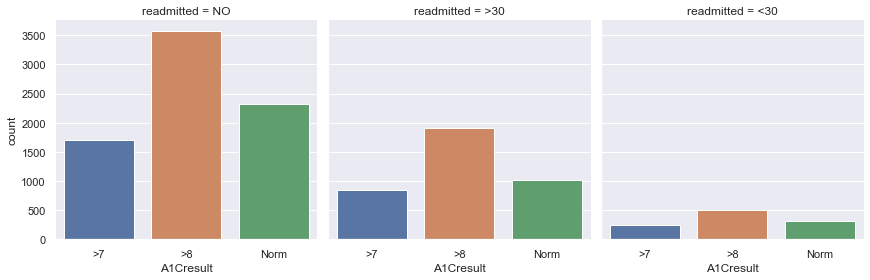

In [62]:
# exclude patients without an A1C reading
alc_none = diabetes[diabetes.A1Cresult != 'None']

# A1C results and readmit impact
sns.catplot('A1Cresult', col='readmitted', data=alc_none, kind='count', height=4, aspect=1)
plt.show()

In [63]:
chart_display(diabetes.readmitted, diabetes.A1Cresult)

A1Cresult,>7,>8,None,Norm,Total
readmitted,,,,,
<30,237,500,5067,317,6121
>30,846,1912,17973,1022,21753
NO,1702,3577,32403,2318,40000
Total,2785,5989,55443,3657,67874


# medications

Let's take a look at changes in medications and diabetes medications.

## change in medications, dosage or brand

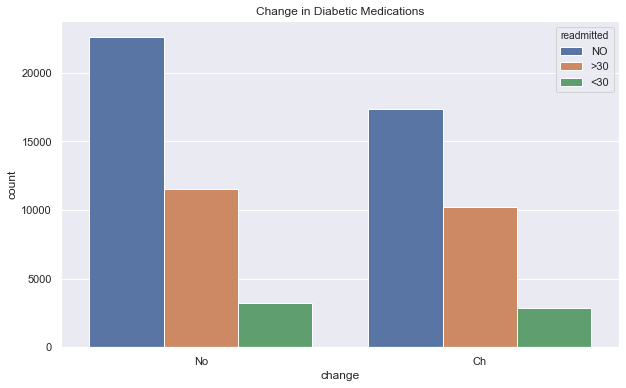

In [64]:
# change in medications
plt.figure(figsize=(10, 6))
sns.countplot(x='change', hue='readmitted', data=diabetes)
plt.title('Change in Diabetic Medications')
plt.show()

In [65]:
chart_display(diabetes.change, diabetes.readmitted)

readmitted,<30,>30,NO,Total
change,,,,
Ch,2894,10237,17367,30498
No,3227,11516,22633,37376
Total,6121,21753,40000,67874


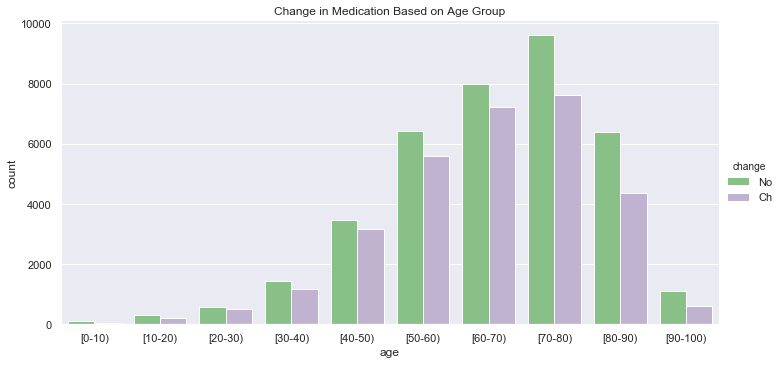

In [66]:
# who is likely or not likely to have a change in medication?
sns.catplot(x='age', hue='change', kind='count', palette='Accent', aspect=2, data=diabetes)
plt.title('Change in Medication Based on Age Group')
plt.show()

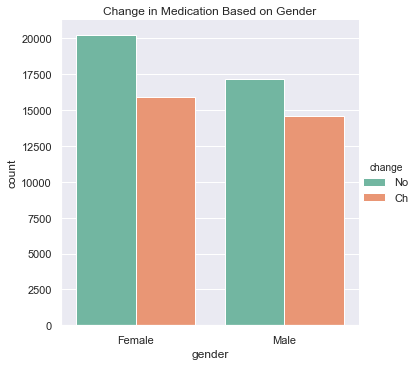

In [67]:
# who is likely or not likely to have a change in medication?
sns.catplot(x='gender', hue='change', kind='count', palette='Set2', aspect=1, data=diabetes)
plt.title('Change in Medication Based on Gender')
plt.show()

In [68]:
chart_display(diabetes.gender, diabetes.readmitted)

readmitted,<30,>30,NO,Total
gender,,,,
Female,3283,11846,21035,36164
Male,2838,9907,18965,31710
Total,6121,21753,40000,67874


## diabetic medications prescribed

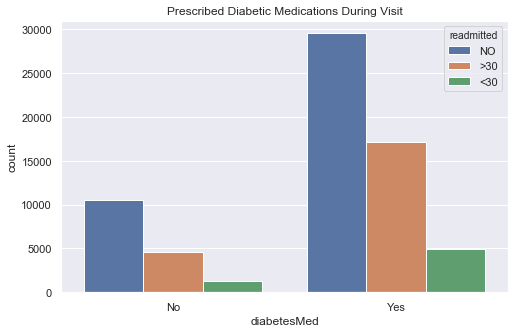

In [69]:
plt.figure(figsize=(8, 5))
sns.countplot(x='diabetesMed', hue='readmitted', data=diabetes)
plt.title('Prescribed Diabetic Medications During Visit')
plt.show()

In [70]:
chart_display(diabetes.diabetesMed, diabetes.readmitted)

readmitted,<30,>30,NO,Total
diabetesMed,,,,
No,1234,4561,10476,16271
Yes,4887,17192,29524,51603
Total,6121,21753,40000,67874


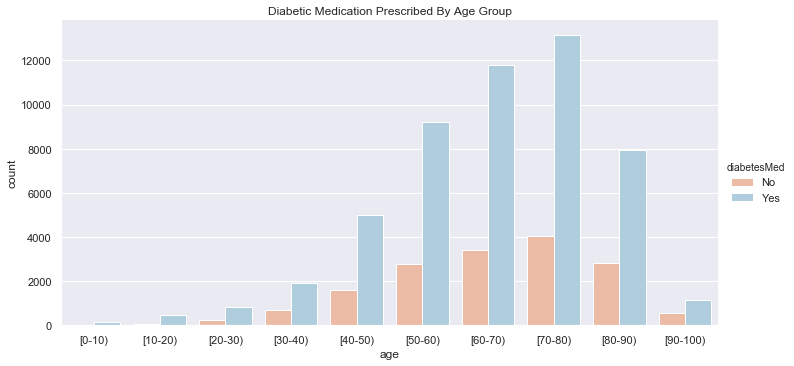

In [71]:
# which age group is likely to have a change in diabetes medication?
sns.catplot(x='age', hue='diabetesMed', kind='count', palette='RdBu', aspect=2, data=diabetes)
plt.title('Diabetic Medication Prescribed By Age Group')
plt.show()

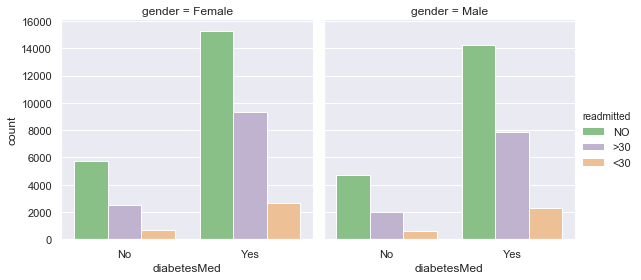

In [72]:
# who is likely or not likely to have a change in medication?
sns.catplot(x='diabetesMed', hue='readmitted', col='gender', palette='Accent', data=diabetes, kind='count', height=4, aspect=1)
plt.show()

## medications used by patients

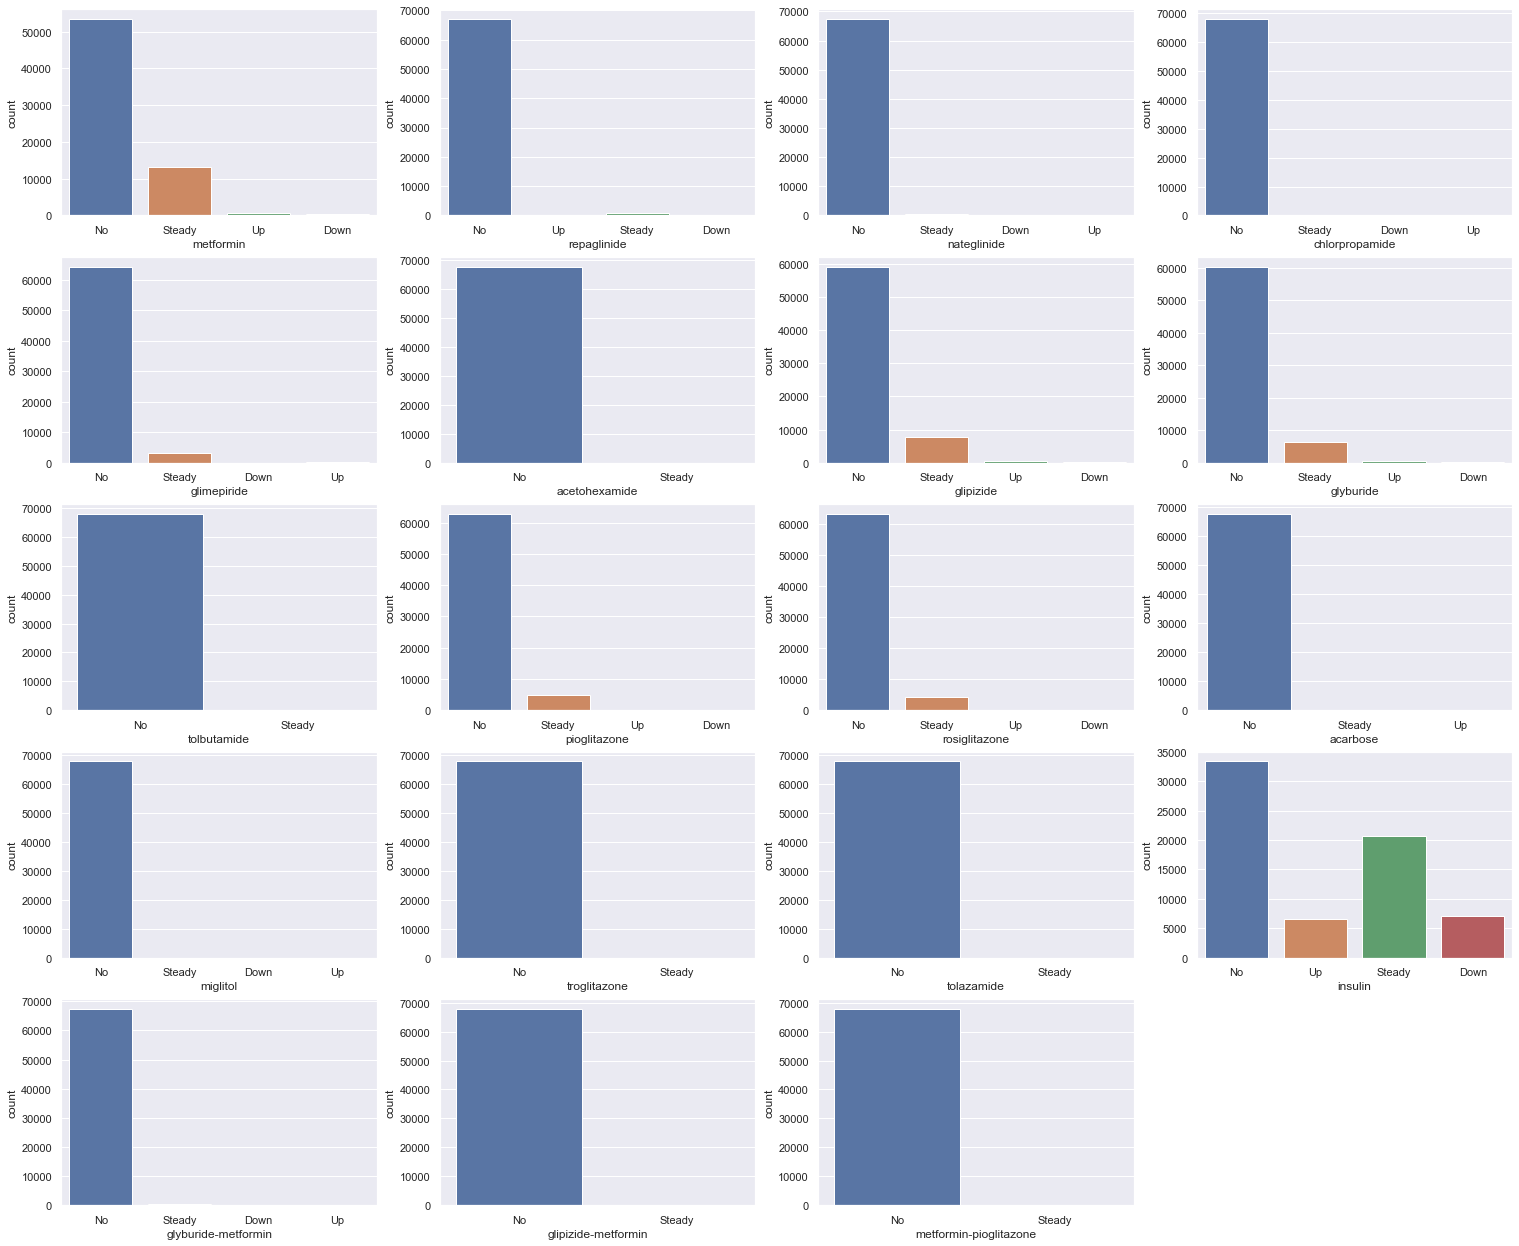

In [73]:
plt.figure(figsize=(26, 22))
plt.subplot(541)
sns.countplot(x='metformin', data=diabetes)
plt.subplot(542)
sns.countplot(x='repaglinide', data=diabetes)
plt.subplot(543)
sns.countplot(x='nateglinide', data=diabetes)
plt.subplot(544)
sns.countplot(x='chlorpropamide', data=diabetes)
plt.subplot(545)
sns.countplot(x='glimepiride', data=diabetes)
plt.subplot(546)
sns.countplot(x='acetohexamide', data=diabetes)
plt.subplot(547)
sns.countplot(x='glipizide', data=diabetes)
plt.subplot(548)
sns.countplot(x='glyburide', data=diabetes)
plt.subplot(549)
sns.countplot(x='tolbutamide', data=diabetes)
plt.subplot(5,4,10)
sns.countplot(x='pioglitazone', data=diabetes)
plt.subplot(5,4,11)
sns.countplot(x='rosiglitazone', data=diabetes)
plt.subplot(5,4,12)
sns.countplot(x='acarbose', data=diabetes)
plt.subplot(5,4,13)
sns.countplot(x='miglitol', data=diabetes)
plt.subplot(5,4,14)
sns.countplot(x='troglitazone', data=diabetes)
plt.subplot(5,4,15)
sns.countplot(x='tolazamide', data=diabetes)
plt.subplot(5,4,16)
sns.countplot(x='insulin', data=diabetes)
plt.subplot(5,4,17)
sns.countplot(x='glyburide-metformin', data=diabetes)
plt.subplot(5,4,18)
sns.countplot(x='glipizide-metformin', data=diabetes)
plt.subplot(5,4,19)
sns.countplot(x='metformin-pioglitazone', data=diabetes)
plt.show()

Dosages for insulin shows the most activity out of all diabetic medications, most of which aren't prescribed to patients.

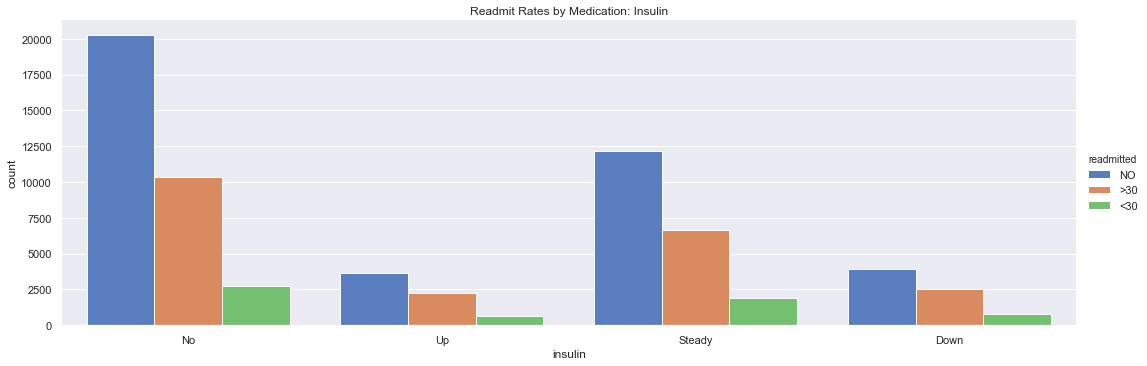

In [74]:
sns.catplot(x='insulin', hue='readmitted', kind='count', palette='muted', aspect=3, data=diabetes)
plt.title('Readmit Rates by Medication: Insulin')
plt.show()